In [0]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

%matplotlib inline

dataset = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv"
df = pd.read_csv(dataset)

In [2]:
df['PrevClose'] = df['close'].shift(1)
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [0]:
input_data = df[['open','high','low','close','volume']].values
targets = df['Return'].values

In [0]:
T = 10
D = input_data.shape[1]
N = len(input_data) - T

In [0]:
Ntrain = len(input_data) * 2//3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [0]:
X_train = np.zeros((Ntrain,T,D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t,:,:] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [0]:
X_test = np.zeros((N - Ntrain,T,D))
Y_test = np.zeros(N - Ntrain)

for t in range(N - Ntrain):
  u = t + Ntrain
  X_test[t,:,:] = input_data[u:u+T]
  Y_test[t] = (targets[u+T] > 0)

In [11]:
i = Input(shape=(T,D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r =model.fit(
    X_train,Y_train,
    epochs=300,batch_size=32,
    validation_data=(X_test,Y_test)
)

Epoch 1/300
27/27 [==============================] - 1s 21ms/step - loss: 0.7030 - accuracy: 0.4732 - val_loss: 0.6928 - val_accuracy: 0.5195
Epoch 2/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6976 - accuracy: 0.5101 - val_loss: 0.6908 - val_accuracy: 0.5488
Epoch 3/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6986 - accuracy: 0.5137 - val_loss: 0.7042 - val_accuracy: 0.4854
Epoch 4/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5328 - val_loss: 0.6948 - val_accuracy: 0.4976
Epoch 5/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.5125 - val_loss: 0.6923 - val_accuracy: 0.4878
Epoch 6/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6944 - accuracy: 0.5304 - val_loss: 0.6934 - val_accuracy: 0.4976
Epoch 7/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.5328 - val_loss: 0.6939 - val_accuracy: 0.4878
Epoch 8/300


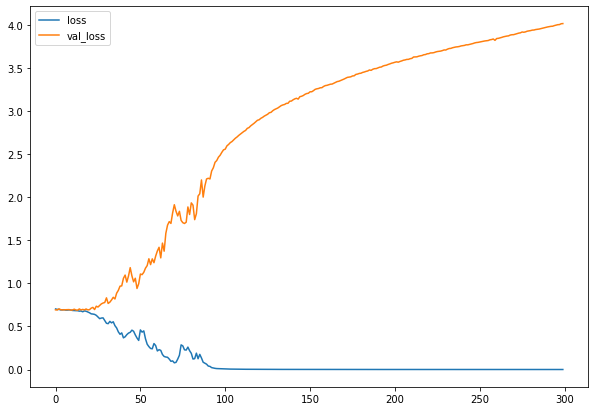

In [12]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

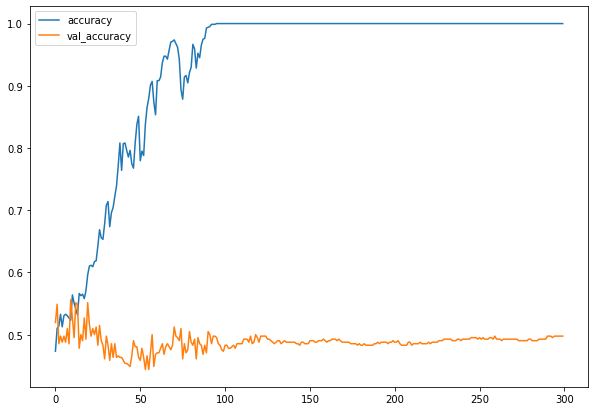

In [13]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()